# Caso Práctico

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## For plotting
import plotly.express as px
import plotly.graph_objects as go
import plotly.tools

In [97]:
import seaborn as sns
sns.set(rc={"figure.figsize":(9, 7)})

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
bops_bm = pd.read_csv('bops_bm.csv')
bops_ol = pd.read_csv('bops_online.csv')

In [10]:
dicc = pd.ExcelFile('diccionarios.xlsx')

In [12]:
bops_bm.shape, bops_ol.shape

((4538, 11), (10710, 17))

In [30]:
bops_bm.drop(columns = ['Unnamed: 7' ,'Unnamed: 8','Unnamed: 9','Unnamed: 10'], inplace=True)
bops_bm.head()

,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,"118,691"
1,1.0,2011.0,4.0,17.0,0.0,0.0,"113,804"
2,1.0,2011.0,4.0,18.0,0.0,0.0,"172,104"
3,1.0,2011.0,5.0,19.0,0.0,0.0,"105,591"
4,1.0,2011.0,5.0,20.0,0.0,0.0,"94,884"


In [31]:
bops_ol.drop(columns = ['Unnamed: 7' ,'Unnamed: 8','Unnamed: 9',
                        'Unnamed: 10','Unnamed: 11','Unnamed: 12',
                        'Unnamed: 13', 'Unnamed: 14','Unnamed: 15','Unnamed: 16'], inplace=True)
bops_ol.head()

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,"18,564"
1,1,2011,4,18,0,1,"30,883"
2,1,2011,5,19,0,1,"37,425"
3,1,2011,5,20,0,1,"32,563"
4,1,2011,5,21,0,1,"35,773"


In [15]:
dicc.sheet_names

['Online Sales', 'Online Data Dictionary', 'B&M Sales', 'B&M Data Dictionary']

In [21]:
ol_dd = dicc.parse('Online Data Dictionary')
ol_dd

/Users/anieto/miniconda3/envs/zsessions/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning:

Unknown extension is not supported and will be removed



,id (DMA),Designated Market Area (DMA) identification code
0,year,Year
1,month,Month number (January =1)
2,week,Week number (first week of the year = 1)
3,after,Equal to 1 if week is after introduction of BO...
4,close,Equal to 1 if week is DMA is within 50 miles o...
5,sales,Total online sales for the week for the DMA in...


In [27]:
print(ol_dd.iloc[3,1])
print(ol_dd.iloc[4,1])

Equal to 1 if week is after introduction of BOPS; 0 otherwise
Equal to 1 if week is DMA is within 50 miles of a store; 0 otherwise


In [20]:
bm_dd = dicc.parse('B&M Data Dictionary')
bm_dd

/Users/anieto/miniconda3/envs/zsessions/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning:

Unknown extension is not supported and will be removed



,id (store),Store identification code
0,year,Year
1,month,Month (January = 1)
2,week,Week (first week of the year = 1)
3,usa,Equal to 1 if store is in the USA; 0 if it is ...
4,after,Equal to 1 if week is after introduction of BO...
5,sales,Total B&M sales for the week for the store


In [28]:
print(bm_dd.iloc[3,1])
print(bm_dd.iloc[4,1])

Equal to 1 if store is in the USA; 0 if it is a Canadian store
Equal to 1 if week is after introduction of BOPS; 0 otherwise


### Understand data

In [45]:
bops_bm.head(2)

,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,"118,691"
1,1.0,2011.0,4.0,17.0,0.0,0.0,"113,804"


In [46]:
bops_bm.columns

Index(['id (store)', 'year', 'month', 'week', 'usa', 'after', ' sales '], dtype='object')

In [47]:
bops_ol.columns

Index(['id (DMA)', 'year', 'month', 'week', 'after', 'close', ' sales '], dtype='object')

In [48]:
bops_ol.rename(columns={'id (DMA)':'id_dma',' sales ':'sales'},inplace=True)
bops_bm.rename(columns={'id (store)':'id_store',' sales ':'sales'},inplace=True)

In [50]:
bops_ol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10710 entries, 0 to 10709
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_dma  10710 non-null  int64 
 1   year    10710 non-null  int64 
 2   month   10710 non-null  int64 
 3   week    10710 non-null  int64 
 4   after   10710 non-null  int64 
 5   close   10710 non-null  int64 
 6   sales   10710 non-null  object
dtypes: int64(6), object(1)
memory usage: 585.8+ KB


In [51]:
bops_bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4538 entries, 0 to 4537
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id_store  4536 non-null   float64
 1   year      4536 non-null   float64
 2   month     4536 non-null   float64
 3   week      4536 non-null   float64
 4   usa       4536 non-null   float64
 5   after     4536 non-null   float64
 6   sales     4536 non-null   object 
dtypes: float64(6), object(1)
memory usage: 248.3+ KB


In [54]:
bops_bm['sales'] = bops_bm['sales'].apply(lambda x: float(str(x).replace(',','')))

In [55]:
bops_ol['sales'] = bops_ol['sales'].apply(lambda x: float(str(x).replace(',','')))

In [41]:
bops_ol.head(2)

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,"18,564"
1,1,2011,4,18,0,1,"30,883"


In [40]:
print(bops_bm.year.value_counts())
print(bops_ol.year.value_counts())

2011.0    3192
2012.0    1344
Name: year, dtype: int64
2011    7770
2012    2940
Name: year, dtype: int64


In [34]:
bops_bm.month.value_counts()

1.0     504
5.0     420
4.0     420
10.0    420
8.0     420
6.0     336
9.0     336
12.0    336
2.0     336
11.0    336
3.0     336
7.0     336
Name: month, dtype: int64

In [38]:
bops_bm['id (store)'].nunique(),bops_ol['id (DMA)'].nunique()

(84, 210)

In [56]:
bops_bm[bops_bm['year']==2011].groupby('month')['sales'].sum()

month
4.0     15667245.0
5.0     29096766.0
6.0     24421761.0
7.0     19882239.0
8.0     22834500.0
9.0     25525114.0
10.0    30975348.0
11.0    26406729.0
12.0    26539938.0
Name: sales, dtype: float64

In [57]:
bops_bm[bops_bm['year']==2012].groupby('month')['sales'].sum()

month
1.0    22967261.0
2.0    16730702.0
3.0    19667916.0
4.0     9013847.0
Name: sales, dtype: float64

In [58]:
bops_ol[bops_ol['year']==2011].groupby('month')['sales'].sum()

month
4      6216381.0
5     17192284.0
6     13149208.0
7     11264609.0
8     14492431.0
9     12351809.0
10    14989778.0
11    18380415.0
12    12706007.0
Name: sales, dtype: float64

In [59]:
bops_ol[bops_ol['year']==2012].groupby('month')['sales'].sum()

month
1    11798879.0
2     8322754.0
3     6459044.0
Name: sales, dtype: float64

> We have BM sales registred for month number 4 but in online we don't.


In [60]:
bops_ol[bops_ol['year']==2012]['month'].value_counts()

1    1260
2     840
3     840
Name: month, dtype: int64

In [64]:
bops_ol[bops_ol['after']==1].groupby('month')['sales'].sum().sum()/1000000

66.854985

In [67]:
bops_ol[bops_ol['after']==0].groupby('month')['sales'].sum().sum()/1000000

80.468614

In [65]:
bops_bm[(bops_bm['usa']==1)&(bops_bm['after']==1)].groupby('month')['sales'].sum().sum()/1000000

110.455609

In [72]:
bops_bm[(bops_bm['usa']==1)&(bops_bm['after']==0)].groupby('month')['sales'].sum().sum()/1000000

122.730695

For the question of how much was lost after the program started, we have:

> Sales went down after the go live of the pick up project.

> BM sales are down by 10% and OL sales are down by 16.9%, corresponding to nearly $12.2 M and $13.6 M.

We can see this directly from the data, using the flag tha indicates the starting week of the new project and obtaining the total sales after and before.

Non-US operation with respect to the go-live

In [74]:
bops_bm[(bops_bm['usa']==0)&(bops_bm['after']==0)].groupby('month')['sales'].sum().sum()/1000000

30.689777

In [76]:
bops_bm[(bops_bm['usa']==0)&(bops_bm['after']==1)].groupby('month')['sales'].sum().sum()/1000000

25.853285

> Sales in non-us stores were down by 15.7%.

> With this in mind and the possible negative effect of the progam perhaps the best not to move the operation to this countries.

Online sales for DMA with close store or not

In [70]:
bops_ol[bops_ol['close']==0].groupby('month')['sales'].sum().sum()/1000000

81.903983

In [71]:
bops_ol[bops_ol['close']==1].groupby('month')['sales'].sum().sum()/1000000

65.419616

> There's a difference in total sales.

In [81]:
bops_ol[(bops_ol['close']==1)&(bops_ol['after']==0)].groupby('month')['sales'].sum().sum()/1000000

36.090582

In [82]:
bops_ol[(bops_ol['close']==1)&(bops_ol['after']==1)].groupby('month')['sales'].sum().sum()/1000000

29.329034

 > For the DMAs with a close store it seems the difference in sales is also present after the kickoff of the new program, 18.7%.

In [83]:
bops_ol[(bops_ol['close']==0)&(bops_ol['after']==0)].groupby('month')['sales'].sum().sum()/1000000

44.378032

In [84]:
bops_ol[(bops_ol['close']==0)&(bops_ol['after']==1)].groupby('month')['sales'].sum().sum()/1000000

37.525951

 > For the DMAs out of range (50 miles) of a store it seems the difference in sales is also there after the kickoff of the new program, 15.4%.

### Average sales per week

In [87]:
bops_ol[bops_ol['after']==0].groupby('week')['sales'].mean().mean()

14737.841391941389

In [88]:
bops_ol[bops_ol['after']==1].groupby('week')['sales'].mean().mean()

12734.282857142856

In [94]:
bops_bm[bops_bm['after']==0].groupby('week')['sales'].mean().mean()

67645.71075837743

In [95]:
bops_bm[bops_bm['after']==1].groupby('week')['sales'].mean().mean()

60100.92328042328

> This are the results from the file.

In [127]:
bops_bm.dropna(inplace=True)

In [137]:
bops_bm[bops_bm['after']==1]['week'].unique()

array([43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,  1.,  2.,
        3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
       16.])

In [152]:
bops_bm.loc[:, 'week_year'] = bops_bm['year'].astype(int).astype(str) + bops_bm['week'].astype(int).astype(str)
bops_ol.loc[:, 'week_year'] = bops_ol['year'].astype(int).astype(str) + bops_ol['week'].astype(int).astype(str)

In [145]:
d = bops_bm.groupby(['week_year','id_store'])['sales'].mean().reset_index()
d.head()

,week_year,id_store,sales
0,201116,1.0,118691.0
1,201116,3.0,31152.0
2,201116,5.0,92159.0
3,201116,7.0,70556.0
4,201116,9.0,91608.0


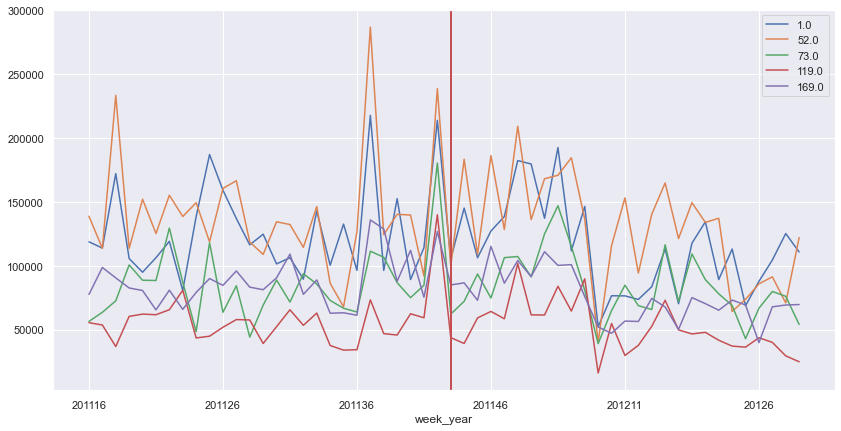

In [151]:
stores = np.random.choice(list(d.id_store),5)

d[d.id_store.isin(stores)].groupby(['week_year',
           'id_store'])[['sales']].mean().reset_index().set_index('week_year').groupby('id_store')['sales'].plot(legend=True,
                                                                                                                   figsize=(14,7))
plt.axvline(x=27, linewidth=2, color='r')
plt.show()

In [154]:
d = bops_ol.groupby(['week_year','id_dma'])['sales'].mean().reset_index()
d.head()

,week_year,id_dma,sales
0,201117,1,18564.0
1,201117,2,86333.0
2,201117,3,24120.0
3,201117,4,2944.0
4,201117,5,27618.0


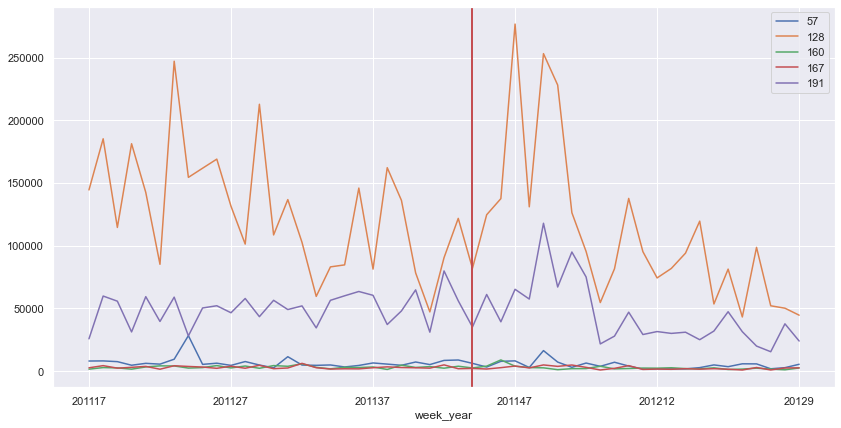

In [155]:
dmas = np.random.choice(list(d.id_dma),5)

d[d.id_dma.isin(dmas)].groupby(['week_year',
           'id_dma'])[['sales']].mean().reset_index().set_index('week_year').groupby('id_dma')['sales'].plot(legend=True,
                                                                                                                   figsize=(14,7))
plt.axvline(x=27, linewidth=2, color='r')
plt.show()

In [156]:
media = bops_ol.groupby(['week_year'])['sales'].mean().reset_index()
media.head()

,week_year,sales
0,201117,14435.152381
1,201118,15166.661905
2,201119,16681.485714
3,201120,16163.423810
4,201121,17782.166667


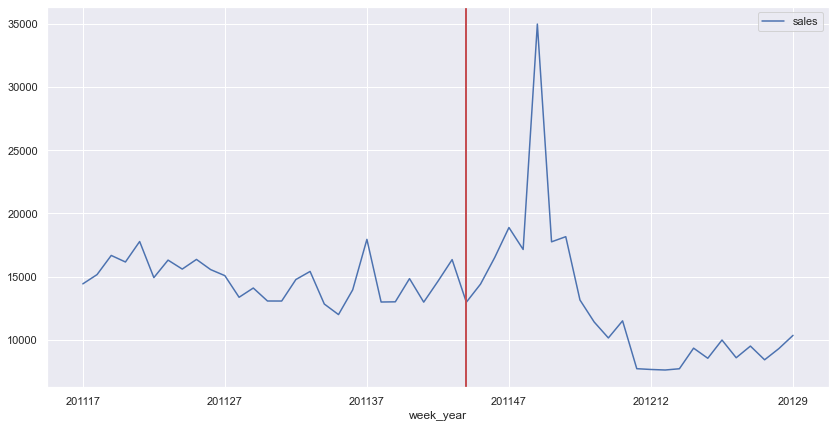

In [158]:
media.set_index('week_year').plot(legend=True,figsize=(14,7))
plt.axvline(x=27, linewidth=2, color='r')
plt.show()

In the chart the red line is the inclusion of the new channel.

> We observe that sales are sustained up until the end of the year.
Soon after, around week 6 to 8 sales start to decrease.